In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic_Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.shape

(418, 12)

<h2>Check null values</h2>

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

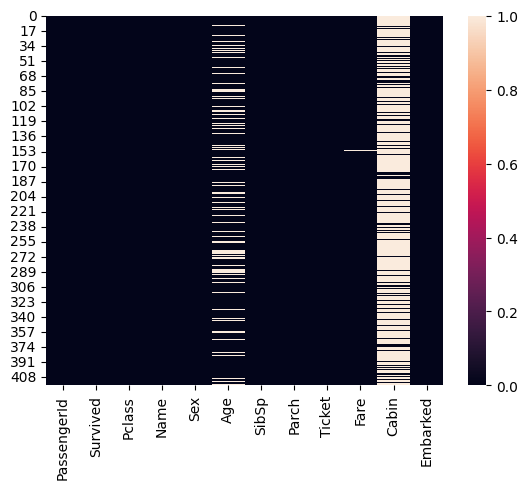

In [7]:
sns.heatmap(df.isnull())

<h3>Dropping cabin column as ot has no use and fare (row with null value) as there is only 1 missing value and dropping it won't harm the dataset</h3>

In [8]:
df = df.drop(columns=['Cabin'])
df = df[df['Fare'].notnull()]

<h2>For age column taking median based on the PClass and Sex</h2>

In [9]:
df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [10]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


<h2>Changing necessary datatypes</h2>

In [12]:
df['Age'] = df['Age'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    int32  
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 37.5+ KB


<h2>Visualization</h2>

<h3>Countplot</h3>

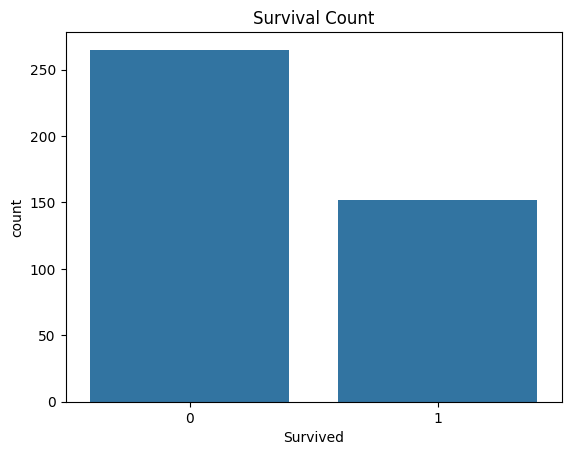

In [14]:
#Survival Distribution
#Survived (0 = No, 1 = Yes)
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()

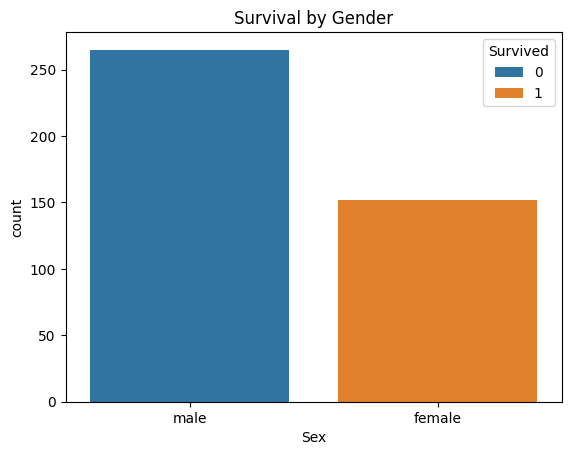

In [15]:
#Survival by Gender
sns.countplot(data=df, x="Sex", hue="Survived")
plt.title("Survival by Gender")
plt.show()

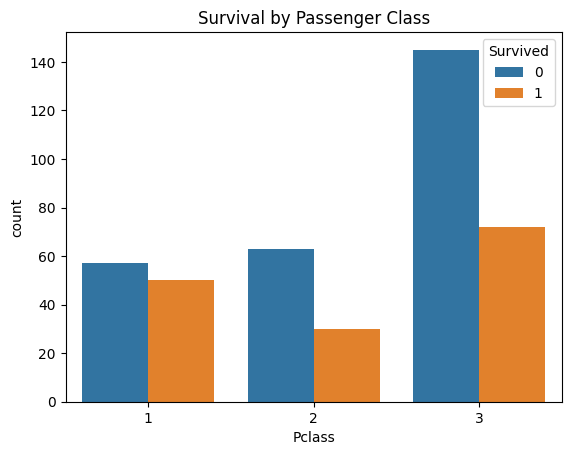

In [16]:
##Survival by Class
sns.countplot(data=df, x="Pclass", hue="Survived")
plt.title("Survival by Passenger Class")
plt.show()

<h3>Histogram</h3>

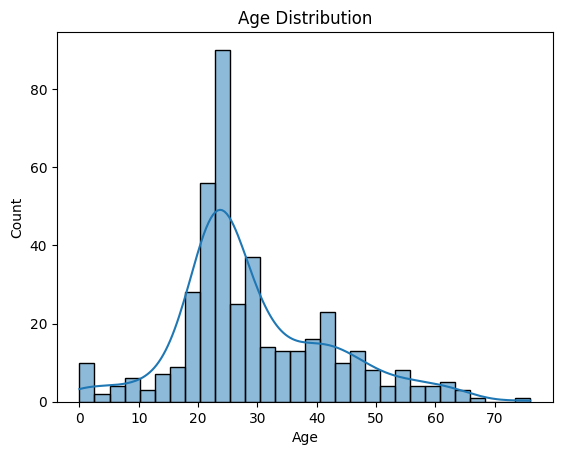

In [17]:
#Age Distribution
sns.histplot(df["Age"], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()

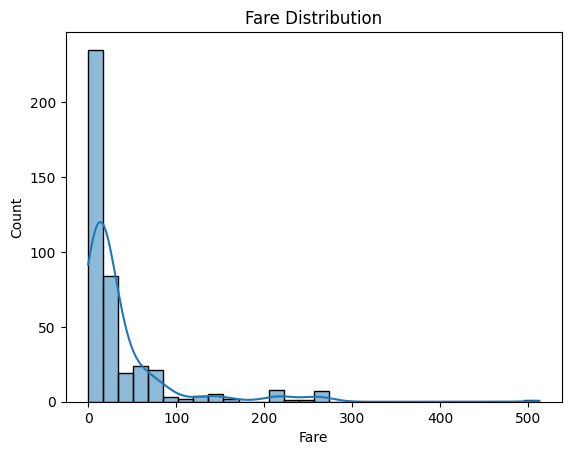

In [18]:
#Fare Distribution
sns.histplot(df["Fare"], kde=True, bins=30)
plt.title("Fare Distribution")
plt.show()

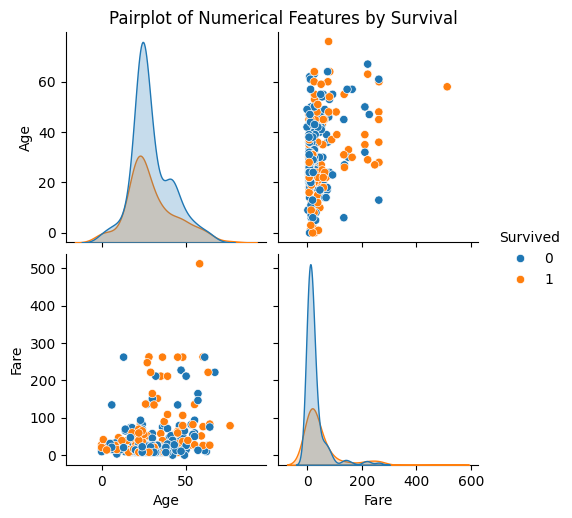

In [19]:
sns.pairplot(df[["Age", "Fare", "Survived"]], hue="Survived", diag_kind="kde")
plt.suptitle("Pairplot of Numerical Features by Survival", y=1.02)
plt.show()

<h3>Boxplot</h3>

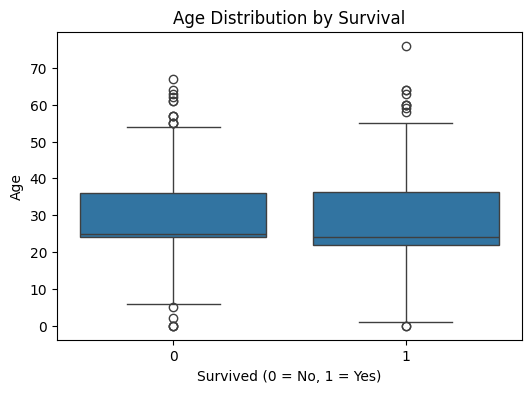

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Survived", y="Age")
plt.title("Age Distribution by Survival")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

<h2>Correlation between variables</h2>

In [21]:
corr = df.corr(numeric_only=True)

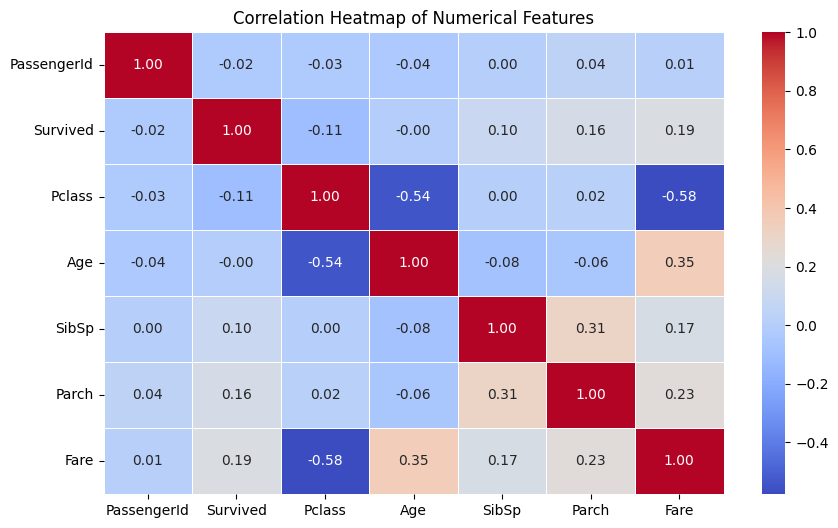

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<h3>Skewness Check</h3>

In [23]:
import numpy as np

In [24]:
# Check skewness before transformation
print("Skewness before log transform:\n", df.skew(numeric_only=True))

# Log transform Fare
df["Fare_log"] = np.log1p(df["Fare"])

# Check skewness after transformation
print("\nSkewness after log transform:\n", df[["Fare", "Fare_log"]].skew())

Skewness before log transform:
 PassengerId   -0.003131
Survived       0.565067
Pclass        -0.530301
Age            0.669266
SibSp          4.163818
Parch          4.648878
Fare           3.687213
dtype: float64

Skewness after log transform:
 Fare        3.687213
Fare_log    0.862168
dtype: float64


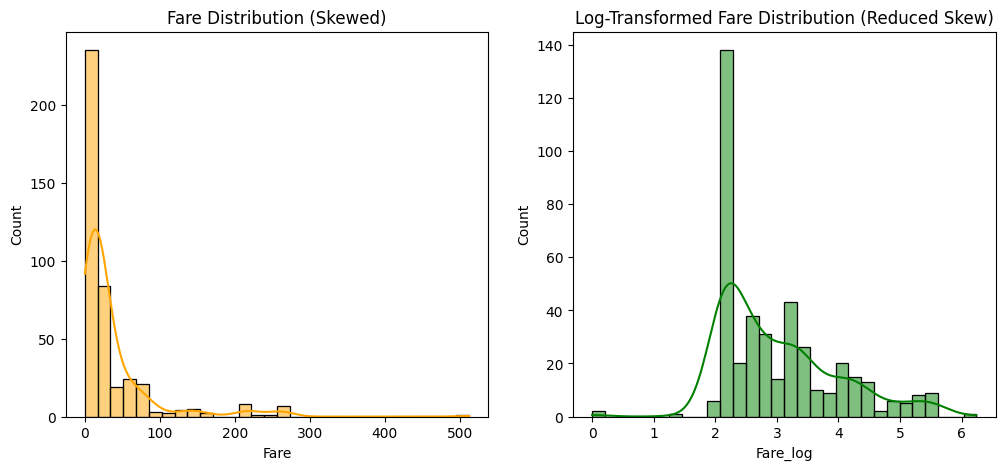

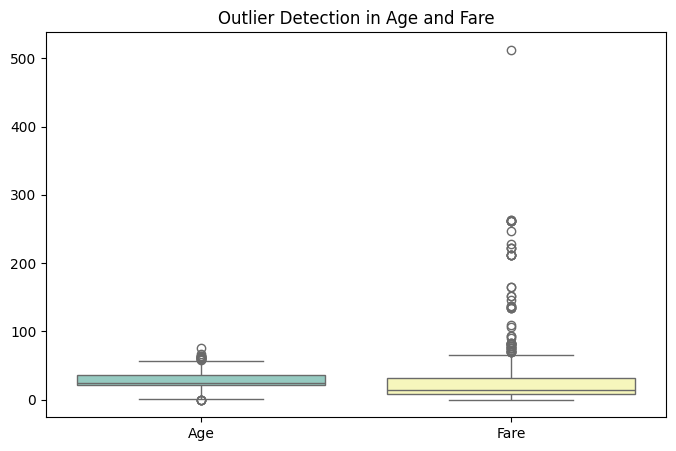

In [25]:
# Histogram for Fare before and after log transform
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Fare"], bins=30, kde=True, color="orange")
plt.title("Fare Distribution (Skewed)")

plt.subplot(1,2,2)
sns.histplot(df["Fare_log"], bins=30, kde=True, color="green")
plt.title("Log-Transformed Fare Distribution (Reduced Skew)")

plt.show()

# Boxplot for detecting outliers in Age & Fare
plt.figure(figsize=(8,5))
sns.boxplot(data=df[["Age","Fare"]], palette="Set3")
plt.title("Outlier Detection in Age and Fare")
plt.show()

<h3>Grouping and using aggregation</h3>

In [26]:
# Survival by gender
print("Survival Rate by Gender:\n", df.groupby("Sex")["Survived"].mean())

# Survival by passenger class
print("\nSurvival Rate by Class:\n", df.groupby("Pclass")["Survived"].mean())

# Survival by embarkation port
print("\nSurvival Rate by Embarked:\n", df.groupby("Embarked")["Survived"].mean())

# Multiple aggregations for class
print("\nClass-level Stats:\n", df.groupby("Pclass").agg({
    "Survived": "mean",
    "Age": "mean",
    "Fare": "mean"
}))

Survival Rate by Gender:
 Sex
female    1.0
male      0.0
Name: Survived, dtype: float64

Survival Rate by Class:
 Pclass
1    0.467290
2    0.322581
3    0.331797
Name: Survived, dtype: float64

Survival Rate by Embarked:
 Embarked
C    0.392157
Q    0.521739
S    0.327138
Name: Survived, dtype: float64

Class-level Stats:
         Survived        Age       Fare
Pclass                                
1       0.467290  40.981308  94.280297
2       0.322581  28.677419  22.202104
3       0.331797  23.612903  12.459678
